In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
import esmpy



In [7]:
#load some functions we have defined in another notebook
%run esmpy_tuto_funcs.ipynb


In [ ]:
# JUST A NOTE: There are potentialy usefull xesmf  utility functions, not just those
# that are automatically brough in, but those in other sections. For example, some of the
# xESMF "backend" functions imported like this (as per one of the xesmf tutorials):
#from xesmf.backend import (
#    Grid,
#    esmf_regrid_build,
#    esmf_regrid_apply,
#)

In [8]:
#The source grid is a regular lat-lon grid
# This is initially and NCT (NCTools) grid; from make_hgrid
grid_s = grid_create_from_nct_rll("/home/mzuniga/xesmf_misc/nct/R180x360_grid.nc")
grid_s

Grid:
    type = <TypeKind.R8: 6>    areatype = <TypeKind.R8: 6>    rank = 2    num_peri_dims = 0    periodic_dim = None    pole_dim = None    pole_kind = None    coord_sys = <CoordSys.SPH_DEG: 1>    staggerloc = [True, False, False, True]    lower bounds = [array([0, 0], dtype=int32), None, None, array([0, 0], dtype=int32)]    upper bounds = [array([ 90, 180], dtype=int32), None, None, array([ 91, 181], dtype=int32)]    coords = [[array([[  1.,   3.,   5., ..., 355., 357., 359.],
       [  1.,   3.,   5., ..., 355., 357., 359.],
       [  1.,   3.,   5., ..., 355., 357., 359.],
       ...,
       [  1.,   3.,   5., ..., 355., 357., 359.],
       [  1.,   3.,   5., ..., 355., 357., 359.],
       [  1.,   3.,   5., ..., 355., 357., 359.]]), array([[-89., -89., -89., ..., -89., -89., -89.],
       [-87., -87., -87., ..., -87., -87., -87.],
       [-85., -85., -85., ..., -85., -85., -85.],
       ...,
       [ 85.,  85.,  85., ...,  85.,  85.,  85.],
       [ 87.,  87.,  87., ...,  87.,  

In [9]:
#The target grid, which also starts off as an NCT grid
# This grid of one degree resolution
grid_t = grid_create_from_nct_rll("/home/mzuniga/xesmf_misc/nct/R360x720_grid.nc")

In [18]:
#open a two degree dataset
#this is to be remapped to one degree
ds_s = xr.open_dataset("/home/mzuniga/nct_search/tests_xesmf/TestRR/R180x360.atmos_daily.nc")


In [19]:
ds_s

<xarray.Dataset>
Dimensions:       (grid_yt: 90, bnds: 2, grid_xt: 180, time: 8, pfull: 24)
Coordinates:
  * grid_yt       (grid_yt) float32 -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * grid_xt       (grid_xt) float32 1.0 3.0 5.0 7.0 ... 353.0 355.0 357.0 359.0
  * time          (time) object 1980-01-01 12:00:00 ... 1980-01-08 12:00:00
  * pfull         (pfull) float32 3.65 19.09 52.34 99.13 ... 976.5 987.4 996.1
Dimensions without coordinates: bnds
Data variables:
    grid_yt_bnds  (grid_yt, bnds) float32 ...
    grid_xt_bnds  (grid_xt, bnds) float32 ...
    time_bounds   (time, bnds) timedelta64[ns] ...
    zsurf         (grid_yt, grid_xt) float32 ...
    temp          (time, pfull, grid_yt, grid_xt) float32 ...
    t_surf        (time, grid_yt, grid_xt) float32 ...
    average_T1    (time) datetime64[ns] ...
    average_T2    (time) datetime64[ns] ...
    average_DT    (time) timedelta64[ns] ...
Attributes:
    filename:              19800101.atmos_daily.tile1.nc
    title:                 c48_amip
    code_release_version:  2023.01
    git_hash:              dcbfc104e96d8e8e59cdd7696f6b0bc0807defff
    creationtime:          Mon Nov 13 17:44:07 2023
    hostname:              sanjuan
    history:               fregrid --input_mosaic R90x180_mosaic.nc --output_...

In [20]:
#RENAMING Coordiantes
#But this does not work:
#ds_s["lon"] = ds_s["grid_xt"]
#ds_s["lat"] = ds_s["grid_yt"]
#ds_s

ds_s = ds_s.rename({'grid_xt' : 'lon', 'grid_yt' : 'lat'})
ds_s 

<xarray.Dataset>
Dimensions:       (lat: 90, bnds: 2, lon: 180, time: 8, pfull: 24)
Coordinates:
  * lat           (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon           (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * time          (time) object 1980-01-01 12:00:00 ... 1980-01-08 12:00:00
  * pfull         (pfull) float32 3.65 19.09 52.34 99.13 ... 976.5 987.4 996.1
Dimensions without coordinates: bnds
Data variables:
    grid_yt_bnds  (lat, bnds) float32 ...
    grid_xt_bnds  (lon, bnds) float32 ...
    time_bounds   (time, bnds) timedelta64[ns] ...
    zsurf         (lat, lon) float32 ...
    temp          (time, pfull, lat, lon) float32 ...
    t_surf        (time, lat, lon) float32 ...
    average_T1    (time) datetime64[ns] ...
    average_T2    (time) datetime64[ns] ...
    average_DT    (time) timedelta64[ns] ...
Attributes:
    filename:              19800101.atmos_daily.tile1.nc
    title:                 c48_amip
    code_release_version:  2023.01
    git_hash:              dcbfc104e96d8e8e59cdd7696f6b0bc0807defff
    creationtime:          Mon Nov 13 17:44:07 2023
    hostname:              sanjuan
    history:               fregrid --input_mosaic R90x180_mosaic.nc --output_...

In [21]:
ds_s_temp = ds_s["temp"]
#temp is dour dimensional; select for one times and one pful
ds_s_temp = ds_s_temp [1][1]
ds_s_temp

<xarray.DataArray 'temp' (lat: 90, lon: 180)>
[16200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
    time     object 1980-01-02 12:00:00
    pfull    float32 19.09
Attributes:
    long_name:      temperature
    units:          K
    valid_range:    [100. 350.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order1

In [22]:
#Create the fields on the grids:
field_s = esmpy.Field(grid_s, name="temp")

In [24]:
#set the input (s) field values:
#note transpose may be needed here ?
#field_s.data[...] = np.transpose(ds_s_temp.to_numpy())
field_s.data[...] = ds_s_temp.to_numpy()

In [11]:
field_t = esmpy.Field(grid_t, name="temp")

In [25]:
#Create a regridder
regrider = esmpy.Regrid(field_s,field_t, regrid_method=esmpy.RegridMethod.CONSERVE,  
                     unmapped_action=esmpy.UnmappedAction.IGNORE)

In [26]:
#And do the regridding:
ds_t_temp = regrid(field_s, field_t)

In [27]:
#Map the  input data filed (which in on the 2 degree grid) to the one degree grid.

In [28]:
#The one degree dataset as remmapped by NCT
ds_t_nct = xr.open_dataset("/home/mzuniga/nct_search/tests_xesmf/TestRR/R360x720.atmos_daily.nc")
##temp is four dimentional. Select for one time and one pfull
ds_t_nct_temp = ds_t_nct.temp[1][1]
ds_t_nct_temp.values

array([[216.4703 , 216.4703 , 216.4703 , ..., 216.46623, 216.46623,
        216.46623],
       [216.4703 , 216.4703 , 216.4703 , ..., 216.46623, 216.46623,
        216.46623],
       [216.4703 , 216.4703 , 216.4703 , ..., 216.46623, 216.46623,
        216.46623],
       ...,
       [213.65233, 213.65233, 213.65233, ..., 213.65479, 213.65479,
        213.65479],
       [213.65233, 213.65233, 213.65233, ..., 213.65479, 213.65479,
        213.65479],
       [213.65233, 213.65233, 213.65233, ..., 213.65479, 213.65479,
        213.65479]], dtype=float32)

In [29]:
plt.plot(ds_t_temp.values, ds_t_nct_temp.values)
plt.show()


AttributeError: 'Field' object has no attribute 'values'

In [18]:
diff = ds_t_temp - ds_t_nct_temp.values
diff
#NOTE: Scaling by 100 for display purposes
diff = diff * 100

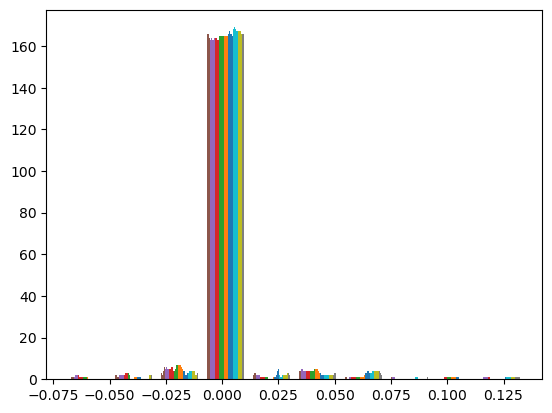

In [19]:
plt.hist(diff, 10)
plt.show()
#Note most discrepancies are within i part in ten thousand; some are not and up to about 1 part in a thousand

In [20]:
#Inspecting max error in the set index 

fdiff = diff.values.flatten()
me_idx  =  fdiff.argmax()
me_idx

50704

In [21]:
fd_v = fdiff [me_idx]


In [22]:
#Verify by printing the various componentrs
fd_v
#NOTE this below is really .00134 since data is scaled by 100 
# this is also about 6e-4 percent error ; error is inthe 6th significant digit

0.13427734

In [23]:
ds_t_temp.values.flatten()[me_idx]

214.9826

In [24]:
ds_t_nct_temp.values.flatten()[me_idx]

214.98126

In [25]:
#plot error magnitues with heat color map on sphere

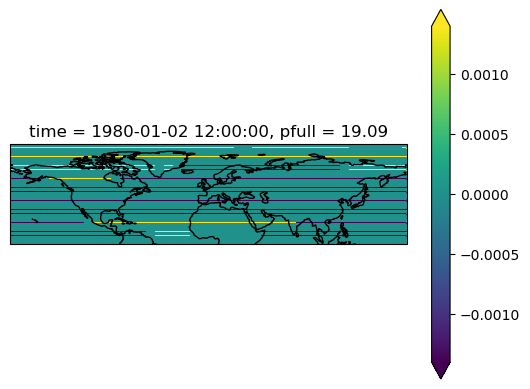

In [26]:
ax = plt.axes(projection=ccrs.PlateCarree())
diff.plot.pcolormesh(ax=ax, vmin=-.0014, vmax=.0014)
ax.coastlines()